<a href="https://colab.research.google.com/github/Janith123gihan/Car-Damage-Classification/blob/main/Car_Damage_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2,os
import numpy as np


data_path= '/content/drive/MyDrive/Car Damage Classification/training'
val_path= '/content/drive/MyDrive/Car Damage Classification/validation'

categories = os.listdir(data_path) #it will list the categories of the images

labels = np.arange(len(categories)) #it will create numpy array with no. of categories

label_dict = dict(zip(categories,labels )) #creating a dictionary with labels and categories

print(label_dict)
print(categories)
print(labels)


{'minor': 0, 'severe': 1, 'moderate': 2}
['minor', 'severe', 'moderate']
[0 1 2]


In [ ]:
def Resize(path):
  img_size = 250

  data = []
  target = []

  for category in categories: #it runs three times
      
      folder_path=os.path.join(path,category) #folderpath with category name like minor
      print(folder_path)
      img_names = os.listdir(folder_path) #it returns each and every images in folder path.
      
      for img_name in img_names:
          img_path=os.path.join(folder_path,img_name) #it combines folder path with image name
          img = cv2.imread(img_path) #then we can read image one by one and do some modifications
          
          try:           
              resized = cv2.resize(img,(img_size,img_size)) #images are in differernt sizes so convert them to same size
              data.append(resized)
              target.append(label_dict[category]) #target for particular image

          except Exception as e:
              
              print(img_path,e)  
  return data, target

data , target = Resize(data_path)  
val_data , val_target = Resize(val_path)

/content/drive/MyDrive/Car Damage Classification/training/minor
/content/drive/MyDrive/Car Damage Classification/training/severe
/content/drive/MyDrive/Car Damage Classification/training/moderate
/content/drive/MyDrive/Car Damage Classification/validation/minor
/content/drive/MyDrive/Car Damage Classification/validation/severe
/content/drive/MyDrive/Car Damage Classification/validation/moderate


In [ ]:
data = np.array(data) 
target = np.array(target)

val_data = np.array(val_data) 
val_target = np.array(val_target)

In [ ]:
print(data.shape,target.shape)
print(val_data.shape,val_target.shape)

(784, 250, 250, 3) (784,)
(171, 250, 250, 3) (171,)


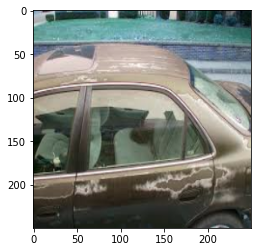

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(val_data[1])


In [ ]:
data_new = data/255.0 #in here normalized images o/w loss become high
validation_data_new = val_data/255.0 #in here normalized images o/w loss become high

# data_new = data_new.reshape(data_new.shape[0],data_new.shape[1],data_new.shape[1],3) 
# validation_data_new = validation_data_new.reshape(validation_data_new.shape[0],validation_data_new.shape[1],validation_data_new.shape[1],3) 

#in here instead of size we have to pass 3 for rgb if grayscale we have to pass 1

print(data_new.shape)
print(validation_data_new.shape)

from keras.utils import np_utils

target_new = np_utils.to_categorical(target) #in here categorical encoding as an example is minor damage it represented as 1 0 0
validation_target_new = np_utils.to_categorical(val_target) #in here categorical encoding as an example is minor damage it represented as 1 0 0

(784, 250, 250, 3)
(171, 250, 250, 3)


In [ ]:
np.save('data',data_new) #data are saved as physical file
np.save('target',target_new) #targets are saved as physical file

np.save('val_data',validation_data_new) #data are saved as physical file
np.save('val_target',validation_target_new) #targets are saved as physical file

In [ ]:
target_new.shape

(784, 3)

In [ ]:
validation_target_new.shape

(171, 3)

# **Training Model**

In [ ]:
data = np.load('/content/data.npy')
target = np.load('/content/target.npy') 

val_data = np.load('/content/val_data.npy')
val_target = np.load('/content/val_target.npy') 

print(data.shape,target.shape)

(784, 250, 250, 3) (784, 3)


In [ ]:
from keras.layers.pooling.global_average_pooling2d import GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,Dropout

model = Sequential() #in here empty neural network model is created

model.add(Conv2D(64,(3,3),activation="relu", input_shape=data.shape[1:])) #convolution layer is added with 256 kernals, 3x3 kernel and size with 100x100
model.add(MaxPooling2D(pool_size=(2,2))) #pooling layer for shrink the image

model.add(Conv2D(128,(3,3),activation="relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))
#second convolution layer follwed by relu and maxpooling layer

model.add(Conv2D(256,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
#third convolution layer follwed by relu and maxpooling layer

model.add(Conv2D(512,(3,3),activation="relu"))
#fourth convolution layer follwed by relu and maxpooling layer

model.add(GlobalAveragePooling2D())
#model.add(Flatten()) #in here flatten layer is added it converts image into dense layer same as ffnn
#flatten layer stacks output convalutions from the second convalution layer

model.add(Dropout(0.5)) #it will reduce overfitting
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))#dense layer with activation function relu
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax')) #final layer with 3 neurons

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 128)     73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 120, 120, 256)     295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 60, 60, 256)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 512)       1

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(rotation_range=10 ,zoom_range=0.15, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.15, horizontal_flip = True,fill_mode="nearest")

#it will augment images into rotation range between 0 to 20 degrees and zoom with range 0 to 0.15 and width and heigth will be shifted among 0 to 0.2 zoom_range
#and shear by range 0.15 and it will flip some images corresponds to horizental axis and fill missing pixels by nearest pixels.


In [ ]:
bs = 32
history = model.fit(aug.flow(data,target,batch_size = bs),steps_per_epoch = len(data)//bs,
          validation_data = (val_data,val_target),validation_steps = len(val_data)//bs,epochs = 50)

Epoch 1/80
24/24 [==============================] - 27s 834ms/step - loss: 1.1055 - accuracy: 0.3697 - val_loss: 1.0898 - val_accuracy: 0.3977
Epoch 2/80
24/24 [==============================] - 13s 519ms/step - loss: 1.0930 - accuracy: 0.3963 - val_loss: 1.0891 - val_accuracy: 0.3977
Epoch 3/80
24/24 [==============================] - 13s 517ms/step - loss: 1.0929 - accuracy: 0.3976 - val_loss: 1.0892 - val_accuracy: 0.3977
Epoch 4/80
24/24 [==============================] - 13s 534ms/step - loss: 1.0907 - accuracy: 0.3896 - val_loss: 1.0863 - val_accuracy: 0.3977
Epoch 5/80
24/24 [==============================] - 13s 526ms/step - loss: 1.0914 - accuracy: 0.3936 - val_loss: 1.0803 - val_accuracy: 0.3977
Epoch 6/80
24/24 [==============================] - 13s 521ms/step - loss: 1.0863 - accuracy: 0.3936 - val_loss: 1.0851 - val_accuracy: 0.3977
Epoch 7/80
24/24 [==============================] - 12s 513ms/step - loss: 1.0877 - accuracy: 0.3923 - val_loss: 1.0908 - val_accuracy: 0.3977

In [ ]:
# history = model.fit(data,target,validation_data=(validation_data,validation_target),epochs=50)

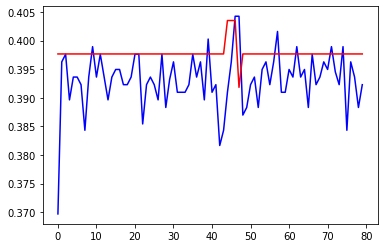

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'],'b')
plt.plot(history.history['val_accuracy'],'r')



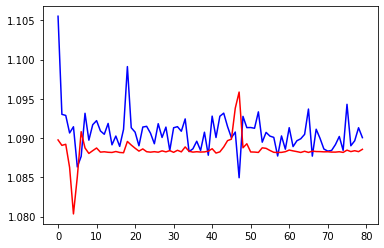

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'b')
plt.plot(history.history['val_loss'],'r')

In [ ]:
model.save('CNN-Car_Damage_Classification.h5')

# Testing Model

In [ ]:
model.load_weights('/content/CNN-Car_Damage_Classification.h5')

Testing Minor images

In [ ]:
test_minor_path = '/content/drive/MyDrive/Car Damage Classification/testing/minor'
test_moderate_path = '/content/drive/MyDrive/Car Damage Classification/testing/moderate'
test_severe_path = '/content/drive/MyDrive/Car Damage Classification/testing/severe'


def Test(path,category):

  img_names = os.listdir(path)

  category_dict = {0 : 'minor', 1 : 'moderate', 2 : 'severe'}

  n = 0

  for img_name in img_names :

    img = cv2.imread(os.path.join(path,img_name))
    h,w = img.shape[0:2]

    #preprocessing as done for training images

    test_img = cv2.resize(img,(250,250))
    test_img = cv2.cvtColor(test_img,cv2.COLOR_BGR2RGB) #by default opencv works with BGR so we have to convert it to RGB
    test_img = test_img/255
    test_img = test_img.reshape(1,250,250,3)
    #by default in testing neural network uses 4d as input so we have to pass no of images in first part and last part we pass dimension

    results = model.predict(test_img)
    label = np.argmax(results,axis = 1)[0] #it returns what is the maximum probability in given row (prediction/max)
    acc = int(np.max(results,axis = 1)[0]*100)


    if(label == category):
      n = n+1
  
    print(results,label,category_dict[label],acc)

  accuracy = n/len(img_names)*100
  return accuracy

accuracy1 = Test(test_minor_path,0)
accuracy2 = Test(test_moderate_path,1)
accuracy3 = Test(test_severe_path,2)




1/1 [==============================] - 0s 420ms/step
[[0.28974363 0.38420698 0.32604942]] 1 moderate 38
1/1 [==============================] - 0s 17ms/step
[[0.28974384 0.38420656 0.32604954]] 1 moderate 38
1/1 [==============================] - 0s 20ms/step
[[0.28974366 0.38420698 0.32604942]] 1 moderate 38
1/1 [==============================] - 0s 17ms/step
[[0.28974363 0.38420698 0.32604942]] 1 moderate 38
1/1 [==============================] - 0s 16ms/step
[[0.28974363 0.38420698 0.32604942]] 1 moderate 38
1/1 [==============================] - 0s 18ms/step
[[0.28974366 0.38420698 0.32604942]] 1 moderate 38
1/1 [==============================] - 0s 19ms/step
[[0.28974363 0.38420698 0.32604942]] 1 moderate 38
1/1 [==============================] - 0s 17ms/step
[[0.28974354 0.38420686 0.3260496 ]] 1 moderate 38
1/1 [==============================] - 0s 19ms/step
[[0.28974345 0.38420677 0.3260498 ]] 1 moderate 38
1/1 [==============================] - 0s 17ms/step
[[0.28974363 0.38420

In [ ]:
#getting average accuracy

total_accuracy = (accuracy1 + accuracy2 + accuracy3)/3
total_accuracy = round(total_accuracy, 2)
print(total_accuracy,'%')

33.33 %
